In [1]:
#시각화를 위해 pandas
import pandas as pd
#iris 데이트는 sklearn 에서 직접 로드 가능
from sklearn.datasets import load_iris
# 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split
#iris 데이터를 분류하기 위해
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해
from sklearn import metrics
from sklearn.metrics import accuracy_score
# sklearn 모델의 동일한 결과 출력을 위해 선언
import numpy as np
np.random.seed(5)

In [19]:
# iris 데이터 불러와 dataset에 할당
dataset = load_iris()
# pandas 의 데이터프레임으로 데이터 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터 프레임에 저장
df['target'] = dataset.target
# 숫자인 분류값의 이해를 위해 문자로 변경
df.target = df.target.map({0:'setosa', 1:"versicolor", 2:"virginica"})
# 데이터 확인
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


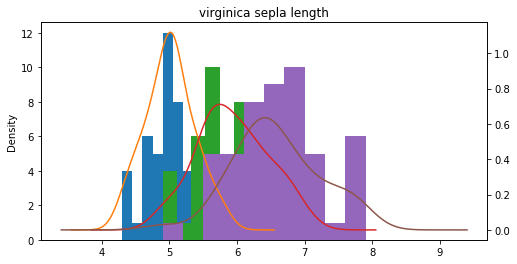

In [12]:
#iris 데이터의 분포도가 정규분포와 유사하다.

# 분류값 별로 데이터 프레임을 나눈다.
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

ax = setosa_df['sepal length (cm)'].plot(kind='hist') #꽃받침 길이
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal length",
                                   figsize = (8,4))

ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor sepal length",
                                        figsize=(8,4))

ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                       ax = ax,
                                       secondary_y=True,
                                       title="virginica sepla length",
                                       figsize = (8,4))



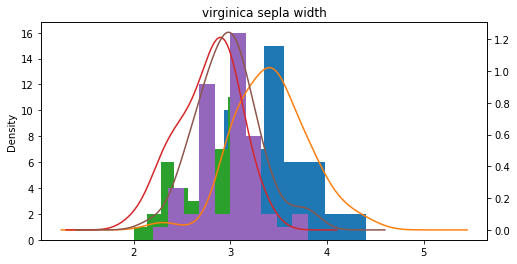

In [20]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', #꽃받침의 폭
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal width",
                                   figsize = (8,4))

ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor sepal width",
                                        figsize=(8,4))

ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde',
                                       ax = ax,
                                       secondary_y=True,
                                       title="virginica sepla width",
                                       figsize = (8,4))

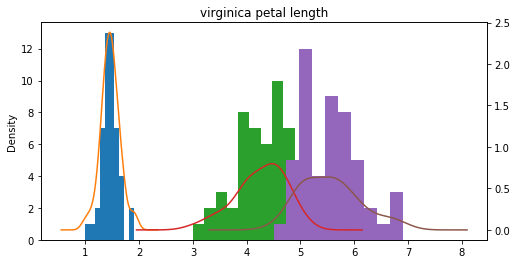

In [21]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa petal length",
                                   figsize = (8,4))

ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor petal length",
                                        figsize=(8,4))

ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde',
                                       ax = ax,
                                       secondary_y=True,
                                       title="virginica petal length",
                                       figsize = (8,4))

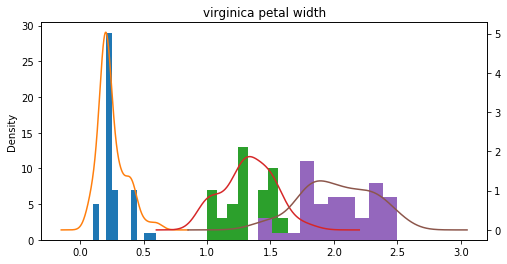

In [24]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa petal width",
                                   figsize = (8,4))

ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor petal width",
                                        figsize=(8,4))

ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde',
                                       ax = ax,
                                       secondary_y=True,
                                       title="virginica petal width",
                                       figsize = (8,4))

In [25]:
# 데이터를 학습 데이터와 테스트 데이터로 나누기
# 20% 를 테스트 데이터로 분류합니다.

X_train, X_test, y_train, y_test = train_test_split(dataset.data,dataset.target,test_size=0.2)

# Gaussian Naive Bayes 분류하기

#학습데이터로 모델을 학습
model = GaussianNB()
model.fit(X_train, y_train)

#테스트 데이터로 모델을 테스트
expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [26]:
accuracy_score(y_test, predicted) #확률로 측정해서 보여준 것

0.9333333333333333

In [27]:
# Confusion Matrix
#첫번째와 세번째는 정확히 분류,

print(metrics.confusion_matrix(expected, predicted))

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
